# Exploratory data analysis

This activity will examine data provided and prepare it for analysis.  
<br/>   

**The purpose** of this project is to conduct exploratory data analysis on a provided data set.
  
**The goal** is to clean the data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

### Part 1. Imports, links, and loading

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib.

Then, import the dataset.

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set an option to view all the columns
pd.set_option('display.max_columns',None)

Visit Data source location - https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/explore?location=7.154814%2C-84.283614%2C3.60&showTable=true

Click `Download` button to download `Part_1_Crime_Data.csv`, the csv format file, to your local.

Load the source data 

In [3]:
crime_data = pd.read_csv('Part_1_Crime_Data.csv', low_memory=False)

### Part 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. 
Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. 

These functions would help you simply understand and structure the data. 
*    `head()`
*    `info()`

In [4]:
df0 = crime_data.copy()
df0

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.601865,39.338840,1,12H11440,2012/08/23 15:20:00+00,5B,BURGLARY,I,NaN,525,F,41.0,BLACK_OR_AFRICAN_AMERICAN,NaN,900 ARGONNE DR,NORTHERN,NaN,EDNOR GARDENS-LAKESIDE,39.338840,-76.601865,"(39.33884,-76.601865)",ROW/TOWNHOUSE-OCC,1
1,-76.609580,39.289697,2,12H11175,2012/08/23 01:30:00+00,4E,COMMON ASSAULT,O,NaN,111,M,60.0,WHITE,NaN,400 E BALTIMORE ST,CENTRAL,NaN,DOWNTOWN,39.289697,-76.609580,"(39.289697,-76.60958)",STREET,1
2,-76.605918,39.332891,3,12H12187,2012/08/23 22:00:00+00,6D,LARCENY FROM AUTO,O,NaN,515,M,66.0,BLACK_OR_AFRICAN_AMERICAN,NaN,700 MCKEWIN AVE,NORTHERN,NaN,WAVERLY,39.332891,-76.605918,"(39.332891,-76.605918)",STREET,1
3,-76.638263,39.301206,4,12H11606,2012/08/23 18:00:00+00,6J,LARCENY,I,NaN,724,F,29.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1200 RIGGS AVE,WESTERN,NaN,SANDTOWN-WINCHESTER,39.301206,-76.638263,"(39.301206,-76.638263)",APT/CONDO - OCCUPIED,1
4,-76.574825,39.294108,5,12H11808,2012/08/23 17:00:00+00,7A,AUTO THEFT,O,NaN,222,U,NaN,UNKNOWN,NaN,100 N POTOMAC ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.294108,-76.574825,"(39.294108,-76.574825)",STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581773,-76.600256,39.324805,581774,13E10616,2013/05/22 17:30:00+00,4E,COMMON ASSAULT,I,NaN,411,F,13.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1300 GORSUCH AVE,NORTHEAST,NaN,COLDSTREAM HOMESTEAD MONTEBELLO,39.324805,-76.600256,"(39.324805,-76.600256)",SCHOOL,1
581774,NaN,NaN,581775,13E10311,2013/05/22 00:00:00+00,7A,AUTO THEFT,O,NaN,NaN,M,27.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1900 -BLK BOONE ST,NaN,NaN,NaN,NaN,NaN,"(,)",STREET,1
581775,-76.540956,39.315629,581776,13E10801,2013/05/22 16:00:00+00,5A,BURGLARY,I,NaN,443,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NaN,6000 MORAVIA PARK DR,NORTHEAST,NaN,FRANKFORD,39.315629,-76.540956,"(39.315629,-76.540956)",APT/CONDO - OCCUPIED,1
581776,-76.587797,39.297575,581777,13E10531,2013/05/22 13:30:00+00,3B,ROBBERY,O,NaN,321,M,64.0,BLACK_OR_AFRICAN_AMERICAN,NaN,2100 MCELDERRY ST,EASTERN,NaN,CARE,39.297575,-76.587797,"(39.29757463142731,-76.58779696079543)",STREET,1


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581778 entries, 0 to 581777
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                580778 non-null  float64
 1   Y                580778 non-null  float64
 2   RowID            581778 non-null  int64  
 3   CCNumber         581478 non-null  object 
 4   CrimeDateTime    581778 non-null  object 
 5   CrimeCode        581778 non-null  object 
 6   Description      581778 non-null  object 
 7   Inside_Outside   448326 non-null  object 
 8   Weapon           143040 non-null  object 
 9   Post             572948 non-null  object 
 10  Gender           488159 non-null  object 
 11  Age              468208 non-null  float64
 12  Race             563611 non-null  object 
 13  Ethnicity        55968 non-null   object 
 14  Location         578621 non-null  object 
 15  Old_District     565280 non-null  object 
 16  New_District     7746 non-null    obje

In [7]:
# There are some colums containing duplicate, `NaN` or insufficient data.
# Drop them to reduce the redundancy and save memory.
columns_to_drop = ['RowID', 'X', 'Y', 'GeoLocation', 'Ethnicity', 'New_District']
df1 = df0.drop(columns=columns_to_drop, axis=1)
df1

,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Location,Old_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents
0,12H11440,2012/08/23 15:20:00+00,5B,BURGLARY,I,NaN,525,F,41.0,BLACK_OR_AFRICAN_AMERICAN,900 ARGONNE DR,NORTHERN,EDNOR GARDENS-LAKESIDE,39.338840,-76.601865,ROW/TOWNHOUSE-OCC,1
1,12H11175,2012/08/23 01:30:00+00,4E,COMMON ASSAULT,O,NaN,111,M,60.0,WHITE,400 E BALTIMORE ST,CENTRAL,DOWNTOWN,39.289697,-76.609580,STREET,1
2,12H12187,2012/08/23 22:00:00+00,6D,LARCENY FROM AUTO,O,NaN,515,M,66.0,BLACK_OR_AFRICAN_AMERICAN,700 MCKEWIN AVE,NORTHERN,WAVERLY,39.332891,-76.605918,STREET,1
3,12H11606,2012/08/23 18:00:00+00,6J,LARCENY,I,NaN,724,F,29.0,BLACK_OR_AFRICAN_AMERICAN,1200 RIGGS AVE,WESTERN,SANDTOWN-WINCHESTER,39.301206,-76.638263,APT/CONDO - OCCUPIED,1
4,12H11808,2012/08/23 17:00:00+00,7A,AUTO THEFT,O,NaN,222,U,NaN,UNKNOWN,100 N POTOMAC ST,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.294108,-76.574825,STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581773,13E10616,2013/05/22 17:30:00+00,4E,COMMON ASSAULT,I,NaN,411,F,13.0,BLACK_OR_AFRICAN_AMERICAN,1300 GORSUCH AVE,NORTHEAST,COLDSTREAM HOMESTEAD MONTEBELLO,39.324805,-76.600256,SCHOOL,1
581774,13E10311,2013/05/22 00:00:00+00,7A,AUTO THEFT,O,NaN,NaN,M,27.0,BLACK_OR_AFRICAN_AMERICAN,1900 -BLK BOONE ST,NaN,NaN,NaN,NaN,STREET,1
581775,13E10801,2013/05/22 16:00:00+00,5A,BURGLARY,I,NaN,443,M,22.0,BLACK_OR_AFRICAN_AMERICAN,6000 MORAVIA PARK DR,NORTHEAST,FRANKFORD,39.315629,-76.540956,APT/CONDO - OCCUPIED,1
581776,13E10531,2013/05/22 13:30:00+00,3B,ROBBERY,O,NaN,321,M,64.0,BLACK_OR_AFRICAN_AMERICAN,2100 MCELDERRY ST,EASTERN,CARE,39.297575,-76.587797,STREET,1


In [8]:
df1.dtypes

CCNumber            object
CrimeDateTime       object
CrimeCode           object
Description         object
Inside_Outside      object
Weapon              object
Post                object
Gender              object
Age                float64
Race                object
Location            object
Old_District        object
Neighborhood        object
Latitude           float64
Longitude          float64
PremiseType         object
Total_Incidents      int64
dtype: object

### Part 2b. Data extraction

Decide which data need to be focused

In [9]:
# Check `Weapon` type
df1['Weapon'].value_counts()

FIREARM                           47570
OTHER                             30818
PERSONAL_WEAPONS                  25719
KNIFE                             17226
HANDS                              6969
HANDGUN                            5396
KNIFE_CUTTING_INSTRUMENT           2971
FIRE                               2264
BLUNT_OBJECT                       2019
UNKNOWN                             929
MOTOR_VEHICLE_VESSEL                384
AUTOMATIC_HANDGUN                   182
ASPHYXIATION                        115
OTHER_FIREARM                       109
RIFLE                                87
FIRE_INCENDIARY_DEVICE               80
SHOTGUN                              76
AUTOMATIC_FIREARM                    72
AUTOMATIC_RIFLE                      23
POISON                               18
DRUGS_NARCOTICS_SLEEPING_PILLS        6
EXPLOSIVES                            4
AUTOMATIC_SHOTGUN                     3
Name: Weapon, dtype: int64

Filter the records that 'Weapon' contains `GUN`, `RIFLE` or `SHOTGUN`.

`FIREARM` type weapon is excluded.

In [10]:
weapon_type_gun = ['HANDGUN','RIFLE','SHOTGUN','AUTOMATIC_HANDGUN','AUTOMATIC_RIFLE','AUTOMATIC_SHOTGUN']
df1 = df1[df1['Weapon'].isin(weapon_type_gun)]
df1 

,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Location,Old_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents
60,23H03990,2023/08/11 16:39:00+00,1A,HOMICIDE,Inside,HANDGUN,421,M,18.0,BLACK_OR_AFRICAN_AMERICAN,1800 E 33rd St,NaN,MONTEBELLO,39.328515,-76.589042,STREET,1
99,23H06485,2023/08/18 05:54:00+00,9S,SHOOTING,Inside,HANDGUN,633,F,33.0,BLACK_OR_AFRICAN_AMERICAN,5200 FAIRLAWN AVE,NaN,WOODMERE,39.342229,-76.684559,STREET,1
146,23H06851,2023/08/19 04:45:00+00,4A,AGG. ASSAULT,Outside,HANDGUN,615,F,26.0,BLACK_OR_AFRICAN_AMERICAN,2900 PRESSTMAN ST,NaN,NORTHWEST COMMUNITY ACTION,39.304616,-76.666256,OTHER/RESIDENTIAL,1
211,23H06729,2023/08/18 18:40:00+00,3AF,ROBBERY,Inside,HANDGUN,414,M,22.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
212,23H06729,2023/08/18 18:40:00+00,3AF,ROBBERY,Inside,HANDGUN,414,F,33.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121062,23G02462,2023/07/08 04:35:00+00,3AF,ROBBERY,NaN,HANDGUN,414,M,64.0,BLACK_OR_AFRICAN_AMERICAN,5600 WOODMONT AVE,NORTHEAST,WOODBOURNE HEIGHTS,39.356677,-76.590771,NaN,1
121066,23G02680,2023/07/08 20:00:00+00,5A,BURGLARY,NaN,HANDGUN,724,M,34.0,BLACK_OR_AFRICAN_AMERICAN,900 N STRICKER ST,WESTERN,SANDTOWN-WINCHESTER,39.299034,-76.641618,NaN,1
121136,23G02450,2023/07/08 02:56:00+00,4A,AGG. ASSAULT,NaN,HANDGUN,313,M,20.0,BLACK_OR_AFRICAN_AMERICAN,500 E EAGER ST,EASTERN,JOHNSTON SQUARE,39.301341,-76.609006,NaN,1
121810,23G04865,2023/07/15 01:05:00+00,4A,AGG. ASSAULT,Inside,HANDGUN,324,F,37.0,WHITE,3000 E FEDERAL ST,NaN,BEREA,39.309284,-76.575798,STREET,1


### Part 2c. Data conversion

Convert object type data into proper type data for the purpose.

Convert data type of `CrimeDateTime` from `object` to `timestamp`

In [11]:
df1['CrimeDateTime'] = pd.to_datetime(df1['CrimeDateTime'])
df1

/var/folders/3d/nh7nkjfd6w77cg85y5yvxj9w0000gn/T/ipykernel_28042/1361042928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CrimeDateTime'] = pd.to_datetime(df1['CrimeDateTime'])


,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Location,Old_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents
60,23H03990,2023-08-11 16:39:00+00:00,1A,HOMICIDE,Inside,HANDGUN,421,M,18.0,BLACK_OR_AFRICAN_AMERICAN,1800 E 33rd St,NaN,MONTEBELLO,39.328515,-76.589042,STREET,1
99,23H06485,2023-08-18 05:54:00+00:00,9S,SHOOTING,Inside,HANDGUN,633,F,33.0,BLACK_OR_AFRICAN_AMERICAN,5200 FAIRLAWN AVE,NaN,WOODMERE,39.342229,-76.684559,STREET,1
146,23H06851,2023-08-19 04:45:00+00:00,4A,AGG. ASSAULT,Outside,HANDGUN,615,F,26.0,BLACK_OR_AFRICAN_AMERICAN,2900 PRESSTMAN ST,NaN,NORTHWEST COMMUNITY ACTION,39.304616,-76.666256,OTHER/RESIDENTIAL,1
211,23H06729,2023-08-18 18:40:00+00:00,3AF,ROBBERY,Inside,HANDGUN,414,M,22.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
212,23H06729,2023-08-18 18:40:00+00:00,3AF,ROBBERY,Inside,HANDGUN,414,F,33.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121062,23G02462,2023-07-08 04:35:00+00:00,3AF,ROBBERY,NaN,HANDGUN,414,M,64.0,BLACK_OR_AFRICAN_AMERICAN,5600 WOODMONT AVE,NORTHEAST,WOODBOURNE HEIGHTS,39.356677,-76.590771,NaN,1
121066,23G02680,2023-07-08 20:00:00+00:00,5A,BURGLARY,NaN,HANDGUN,724,M,34.0,BLACK_OR_AFRICAN_AMERICAN,900 N STRICKER ST,WESTERN,SANDTOWN-WINCHESTER,39.299034,-76.641618,NaN,1
121136,23G02450,2023-07-08 02:56:00+00:00,4A,AGG. ASSAULT,NaN,HANDGUN,313,M,20.0,BLACK_OR_AFRICAN_AMERICAN,500 E EAGER ST,EASTERN,JOHNSTON SQUARE,39.301341,-76.609006,NaN,1
121810,23G04865,2023-07-15 01:05:00+00:00,4A,AGG. ASSAULT,Inside,HANDGUN,324,F,37.0,WHITE,3000 E FEDERAL ST,NaN,BEREA,39.309284,-76.575798,STREET,1


In [12]:
# Check the data type of `CrimeDateTime` data
df1.dtypes

CCNumber                        object
CrimeDateTime      datetime64[ns, UTC]
CrimeCode                       object
Description                     object
Inside_Outside                  object
Weapon                          object
Post                            object
Gender                          object
Age                            float64
Race                            object
Location                        object
Old_District                    object
Neighborhood                    object
Latitude                       float64
Longitude                      float64
PremiseType                     object
Total_Incidents                  int64
dtype: object

### Part 2d. Data cleaning

Review null value data and decide whether they need to be removed or kept.

Focus on `Latitude` and `Longitude` columns

In [13]:
# Check null values in the records
df1.isna().sum()

CCNumber              0
CrimeDateTime         0
CrimeCode             0
Description           0
Inside_Outside     5279
Weapon                0
Post                 82
Gender              430
Age                 465
Race                787
Location             47
Old_District        550
Neighborhood         82
Latitude             11
Longitude            11
PremiseType        5279
Total_Incidents       0
dtype: int64

There are some records with null values.

The goal of this work is to render the location of the gun violence on the `Baltimore City` map 

and to review the detail information on each violence.

For these reasons, `Latitude` and `Longitude` records should `NOT` be `null`.

But, 11 `null` records are found by `isna().sum()` command.

Let's drop the records with null `Latitude` and `Longitude`.

In [14]:
df2 = df1.dropna(subset=['Latitude', 'Longitude'], axis=0).reset_index(drop=True)
# check null values in the records
df2.isna().sum()

CCNumber              0
CrimeDateTime         0
CrimeCode             0
Description           0
Inside_Outside     5272
Weapon                0
Post                 71
Gender              430
Age                 465
Race                786
Location             38
Old_District        539
Neighborhood         71
Latitude              0
Longitude             0
PremiseType        5272
Total_Incidents       0
dtype: int64

In [15]:
df2

,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Location,Old_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents
0,23H03990,2023-08-11 16:39:00+00:00,1A,HOMICIDE,Inside,HANDGUN,421,M,18.0,BLACK_OR_AFRICAN_AMERICAN,1800 E 33rd St,NaN,MONTEBELLO,39.328515,-76.589042,STREET,1
1,23H06485,2023-08-18 05:54:00+00:00,9S,SHOOTING,Inside,HANDGUN,633,F,33.0,BLACK_OR_AFRICAN_AMERICAN,5200 FAIRLAWN AVE,NaN,WOODMERE,39.342229,-76.684559,STREET,1
2,23H06851,2023-08-19 04:45:00+00:00,4A,AGG. ASSAULT,Outside,HANDGUN,615,F,26.0,BLACK_OR_AFRICAN_AMERICAN,2900 PRESSTMAN ST,NaN,NORTHWEST COMMUNITY ACTION,39.304616,-76.666256,OTHER/RESIDENTIAL,1
3,23H06729,2023-08-18 18:40:00+00:00,3AF,ROBBERY,Inside,HANDGUN,414,M,22.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
4,23H06729,2023-08-18 18:40:00+00:00,3AF,ROBBERY,Inside,HANDGUN,414,F,33.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,23G02462,2023-07-08 04:35:00+00:00,3AF,ROBBERY,NaN,HANDGUN,414,M,64.0,BLACK_OR_AFRICAN_AMERICAN,5600 WOODMONT AVE,NORTHEAST,WOODBOURNE HEIGHTS,39.356677,-76.590771,NaN,1
5752,23G02680,2023-07-08 20:00:00+00:00,5A,BURGLARY,NaN,HANDGUN,724,M,34.0,BLACK_OR_AFRICAN_AMERICAN,900 N STRICKER ST,WESTERN,SANDTOWN-WINCHESTER,39.299034,-76.641618,NaN,1
5753,23G02450,2023-07-08 02:56:00+00:00,4A,AGG. ASSAULT,NaN,HANDGUN,313,M,20.0,BLACK_OR_AFRICAN_AMERICAN,500 E EAGER ST,EASTERN,JOHNSTON SQUARE,39.301341,-76.609006,NaN,1
5754,23G04865,2023-07-15 01:05:00+00:00,4A,AGG. ASSAULT,Inside,HANDGUN,324,F,37.0,WHITE,3000 E FEDERAL ST,NaN,BEREA,39.309284,-76.575798,STREET,1


The total number of records has been decreased from `5767` to `5756`

For the convinience, 

extract the only `year 2023` records, allowing us to handle them in an easy way for the portotype map rendering work.

In [16]:
df_2023 = df2[df2['CrimeDateTime'].dt.year > 2022]
df_2023

,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Location,Old_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents
0,23H03990,2023-08-11 16:39:00+00:00,1A,HOMICIDE,Inside,HANDGUN,421,M,18.0,BLACK_OR_AFRICAN_AMERICAN,1800 E 33rd St,NaN,MONTEBELLO,39.328515,-76.589042,STREET,1
1,23H06485,2023-08-18 05:54:00+00:00,9S,SHOOTING,Inside,HANDGUN,633,F,33.0,BLACK_OR_AFRICAN_AMERICAN,5200 FAIRLAWN AVE,NaN,WOODMERE,39.342229,-76.684559,STREET,1
2,23H06851,2023-08-19 04:45:00+00:00,4A,AGG. ASSAULT,Outside,HANDGUN,615,F,26.0,BLACK_OR_AFRICAN_AMERICAN,2900 PRESSTMAN ST,NaN,NORTHWEST COMMUNITY ACTION,39.304616,-76.666256,OTHER/RESIDENTIAL,1
3,23H06729,2023-08-18 18:40:00+00:00,3AF,ROBBERY,Inside,HANDGUN,414,M,22.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
4,23H06729,2023-08-18 18:40:00+00:00,3AF,ROBBERY,Inside,HANDGUN,414,F,33.0,BLACK_OR_AFRICAN_AMERICAN,6100 CHINQUAPIN PKWY,NaN,GLEN OAKS,39.367111,-76.598880,STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,23G02567,2023-07-08 04:45:00+00:00,3AF,ROBBERY,NaN,HANDGUN,413,M,62.0,BLACK_OR_AFRICAN_AMERICAN,1100 E COLD SPRING LN,NORTHEAST,NEW NORTHWOOD,39.345129,-76.599069,NaN,1
5751,23G02462,2023-07-08 04:35:00+00:00,3AF,ROBBERY,NaN,HANDGUN,414,M,64.0,BLACK_OR_AFRICAN_AMERICAN,5600 WOODMONT AVE,NORTHEAST,WOODBOURNE HEIGHTS,39.356677,-76.590771,NaN,1
5752,23G02680,2023-07-08 20:00:00+00:00,5A,BURGLARY,NaN,HANDGUN,724,M,34.0,BLACK_OR_AFRICAN_AMERICAN,900 N STRICKER ST,WESTERN,SANDTOWN-WINCHESTER,39.299034,-76.641618,NaN,1
5753,23G02450,2023-07-08 02:56:00+00:00,4A,AGG. ASSAULT,NaN,HANDGUN,313,M,20.0,BLACK_OR_AFRICAN_AMERICAN,500 E EAGER ST,EASTERN,JOHNSTON SQUARE,39.301341,-76.609006,NaN,1


In [17]:
df_2023.groupby(by=['Neighborhood'])['Total_Incidents'].sum().sort_values(ascending=False)

Neighborhood
DOWNTOWN                      53
BELAIR-EDISON                 48
FRANKFORD                     42
SANDTOWN-WINCHESTER           30
WASHINGTON VILLAGE/PIGTOWN    30
                              ..
TREMONT                        1
CROSS KEYS                     1
UPLANDS                        1
CROSS COUNTRY                  1
New Northwood                  1
Name: Total_Incidents, Length: 225, dtype: int64

In [18]:
df_2023.groupby(by='Weapon')['Total_Incidents'].sum().sort_values(ascending=False)

Weapon
HANDGUN              1720
AUTOMATIC_HANDGUN      33
RIFLE                  24
SHOTGUN                10
AUTOMATIC_RIFLE         9
Name: Total_Incidents, dtype: int64

In [23]:
df_2023.groupby(by='Description')['Total_Incidents'].sum().sort_values(ascending=False)

Description
ROBBERY                 740
AGG. ASSAULT            613
ROBBERY - CARJACKING    215
ROBBERY - COMMERCIAL    124
SHOOTING                 39
BURGLARY                 27
HOMICIDE                 12
LARCENY                   8
AUTO THEFT                7
COMMON ASSAULT            6
RAPE                      4
LARCENY FROM AUTO         1
Name: Total_Incidents, dtype: int64

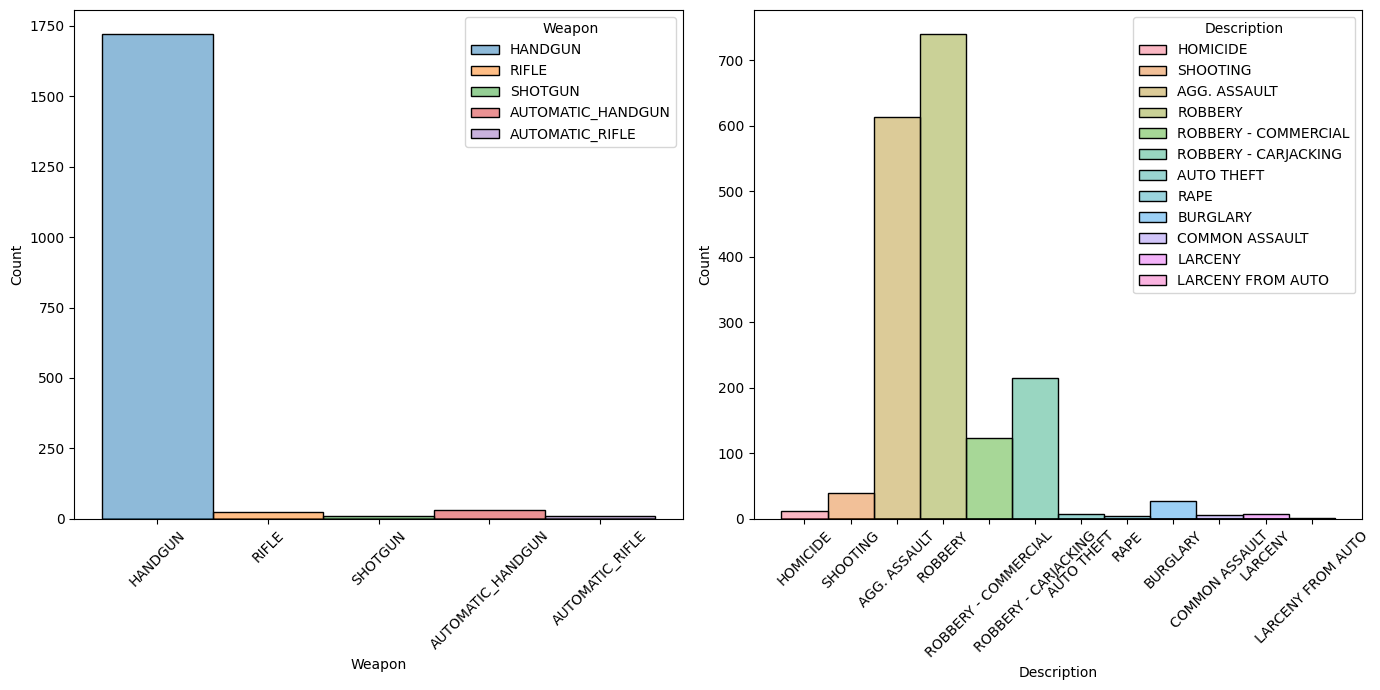

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.histplot(ax=ax[0], data=df_2023, x='Weapon', hue='Weapon')
ax[0].tick_params(axis='x', rotation=45)
sns.histplot(ax=ax[1], data=df_2023, x='Description', hue='Description')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Part 3. Building Visualizations

Use `folium` to render the location data to the `Baltimore City` map.

#### Part 3a. Preparation

Get the mean of latitude and longitude to get the center point of the map.

In [20]:
# Get the mean of latitude and longitude to get the center point of the map. 
lat  = df_2023['Latitude'].mean()
long = df_2023['Longitude'].mean()
lat, long

(39.264060735861506, -76.53010302768271)

#### Part 3b. Creating a color pick function

Implement a function to map weapon type onto color.

According to `folium document`, color icons should one of the following colors:

`beige`, `black`, `blue`, `cadetblue`, `gray`, `green`, `orange`, `pink`, `purple`, `red`, `white`,

`darkblue`, `darkgreen`, `darkpurple`, `darkred`, `lightblue`, `lightgray`, `lightgreen`, `lightred`

In [21]:
def weapon_mapper(index):
    if df_2023.loc[index, 'Weapon'] == 'HANDGUN':
        color = "orange"
    elif df_2023.loc[index, 'Weapon'] == 'RIFLE':
        color = "blue"
    elif df_2023.loc[index, 'Weapon'] == 'SHOTGUN':
        color = "green"
    elif df_2023.loc[index, 'Weapon'] == 'AUTOMATIC_HANDGUN':
        color = "pink"
    elif df_2023.loc[index, 'Weapon'] == 'AUTOMATIC_RIFLE':
        color = "purple"
    else:
        color = "red"

    return color

#### Part 3c. Rendering the map

Map the data onto the `Baltimore City` map.

In [22]:
figure = folium.Figure(width='70%', height=None)
map_balt = folium.Map([lat, long], zoom_start=11).add_to(figure)
marker_cluster = MarkerCluster().add_to(map_balt)

for i in df_2023.index:
    sub_lat =  df_2023.loc[i, 'Latitude']
    sub_long = df_2023.loc[i, 'Longitude']
    color = weapon_mapper(i)
    tip=f"""
        Type: {df_2023.loc[i,'Weapon']}<br/>
        Loca: {df_2023.loc[i,'Location']}<br/>
        Date: {df_2023.loc[i,'CrimeDateTime']}
        """
    folium.Marker(
        location=[sub_lat, sub_long],
        icon=folium.Icon(color=color),
        tooltip=tip
    ).add_to(marker_cluster)

map_balt

### Part 4. Evaluate and share results

##### Part 4a. Summary
With the raw data provided by Baltimore Police Deptment, 

a dataset for this analysis is generated by the following conditions.
- Year: `2023`
- Weapon: `GUN type weapons` such as `HANDGUN`, `AUTOMATIC_RIFLE` and etc.

##### Part 4b. EDA (Gun Type)
- `HANDGUN` is the most frequently used gun.
- `AUTOMATIC_HANDGUN` is the 2nd frequently used one.
- `AUTOMATIC_RIFLE` is the 3rd frequently used one.

##### Part 4c. EDA (Criminal Type)
- `ROBERY` is the top criminal type.
- `AGG. ASSULT` is the 2nd criminal one.
- `SHOOTING` is the 3rd one.

##### Part 4c. EDA (Location by Map Review)
- `Downtown`  is the 1st place where the gun violencies frequently happen.
- `Northwest` is the 2nd place.
- `Northeast` is the 3rd place.

##### Part 4d. What's Next?
- Additional demographic information such as `Income`, `Housing price`, `Occupation`, `CCTV Distribution` may help us understand better about the criminal trends.